# Setup

In [99]:
%matplotlib inline

In [100]:
from fastai.vision.all import *
from nbdev.showdoc import *

set_seed(42) 

In [101]:
torch.cuda.set_device(4)

In [102]:
bs = 32

# Get Data

In [103]:
path = 'plant_seedlings_v2'


In [104]:
fns=get_image_files(path)
fns

(#5539) [Path('plant_seedlings_v2/black_grass/1.png'),Path('plant_seedlings_v2/black_grass/10.png'),Path('plant_seedlings_v2/black_grass/100.png'),Path('plant_seedlings_v2/black_grass/101.png'),Path('plant_seedlings_v2/black_grass/102.png'),Path('plant_seedlings_v2/black_grass/103.png'),Path('plant_seedlings_v2/black_grass/104.png'),Path('plant_seedlings_v2/black_grass/105.png'),Path('plant_seedlings_v2/black_grass/106.png'),Path('plant_seedlings_v2/black_grass/107.png')...]

# Step 1 - Data Loader

In [105]:
weeds=DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=(0.2),seed=42),
               get_y=parent_label,item_tfms=Resize(224))

In [106]:
dls=weeds.dataloaders(path,num_workers = 0,bs=64)

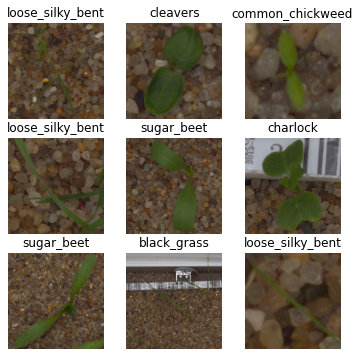

In [107]:
dls.show_batch(max_n=9, figsize=(6,6))

# Step 2 - Building a Model

In [108]:
learner=cnn_learner(dls,resnet18,metrics=[accuracy, error_rate])

# Step 3 - Learning

In [109]:
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.201967,0.743911,0.760614,0.239386,01:07
1,1.013543,0.443316,0.842818,0.157182,00:54
2,0.601430,0.414478,0.854562,0.145438,01:01


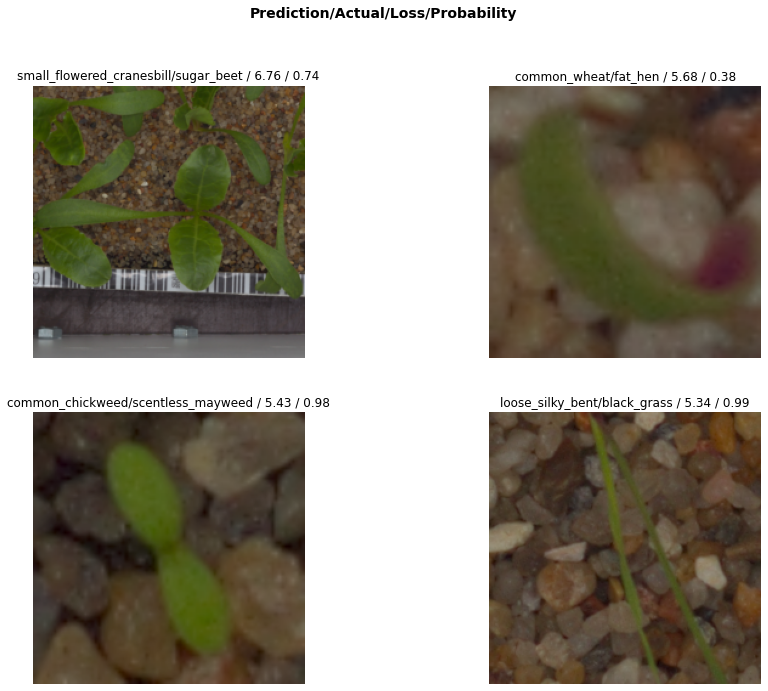

In [110]:
interpretation = ClassificationInterpretation.from_learner(learner)
losses, indices = interpretation.top_losses()
interpretation.plot_top_losses(4, figsize=(15,11))

In [111]:
learner.fine_tune(2, 3e-2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.894192,1.192250,0.801265,0.198735,01:06


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.957517,1.184552,0.787715,0.212285,01:05
1,0.456150,0.242604,0.920506,0.079494,00:55


In [53]:
print("Accuracy: ", 1-float(learner.recorder.metrics[0].value))

Accuracy:  0.07497739791870117


In [54]:
learner.save('stage-1_0.08')

Path('models/stage-1_0.08.pth')

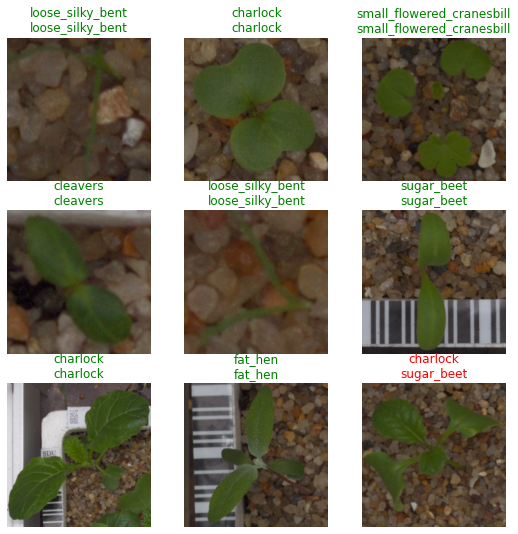

In [55]:
learner.show_results()

In [56]:
interp = Interpretation.from_learner(learner)

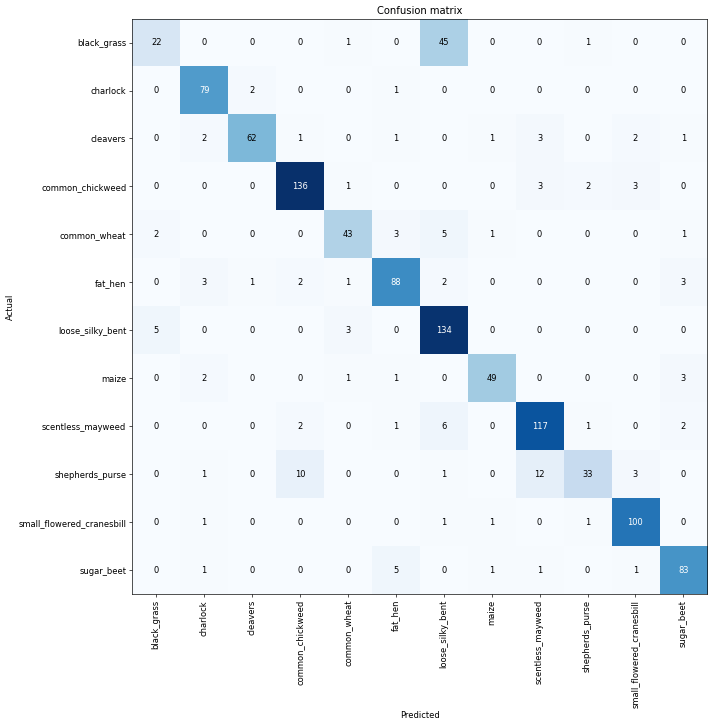

In [57]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Optimization

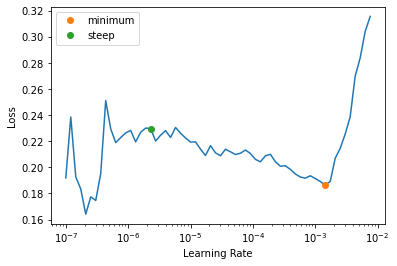

In [58]:
lr_min,lr_steep = learner.lr_find(suggest_funcs=(minimum,steep))

In [59]:
interpretation.most_confused(min_val=2)

[('black_grass', 'loose_silky_bent', 45),
 ('shepherds_purse', 'scentless_mayweed', 12),
 ('shepherds_purse', 'common_chickweed', 10),
 ('scentless_mayweed', 'loose_silky_bent', 6),
 ('common_wheat', 'loose_silky_bent', 5),
 ('loose_silky_bent', 'black_grass', 5),
 ('sugar_beet', 'fat_hen', 5),
 ('cleavers', 'scentless_mayweed', 3),
 ('common_chickweed', 'scentless_mayweed', 3),
 ('common_chickweed', 'small_flowered_cranesbill', 3),
 ('common_wheat', 'fat_hen', 3),
 ('fat_hen', 'charlock', 3),
 ('fat_hen', 'sugar_beet', 3),
 ('loose_silky_bent', 'common_wheat', 3),
 ('maize', 'sugar_beet', 3),
 ('shepherds_purse', 'small_flowered_cranesbill', 3),
 ('charlock', 'cleavers', 2),
 ('cleavers', 'charlock', 2),
 ('cleavers', 'small_flowered_cranesbill', 2),
 ('common_chickweed', 'shepherds_purse', 2),
 ('common_wheat', 'black_grass', 2),
 ('fat_hen', 'common_chickweed', 2),
 ('fat_hen', 'loose_silky_bent', 2),
 ('maize', 'charlock', 2),
 ('scentless_mayweed', 'common_chickweed', 2),
 ('scent

In [60]:
learner = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate])

In [61]:
learner.lr_find()

RuntimeError: CUDA out of memory. Tried to allocate 26.00 MiB (GPU 4; 39.59 GiB total capacity; 10.40 GiB already allocated; 21.44 MiB free; 10.52 GiB reserved in total by PyTorch)

In [ ]:
learner.fit_one_cycle(3, lr_max=0.0003)

In [ ]:
learner.unfreeze()
learner.fit_one_cycle(10, lr_max=slice(1e-5,2e-4))

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")